In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from matplotlib.ticker import FormatStrFormatter
from scipy.optimize import curve_fit
from scipy.stats import maxwell

In [87]:
# Importing csv of Duty Cycle calculations.
# Converting back to a numpy array to make calculations easier.

table = pd.read_csv('DutyCyclesFSRQBLL.csv')
table=table[table.iloc[:,2]!= '0']
table = pd.DataFrame.to_numpy(table)

### Plotting Data

0.1828236351899027 0.2515305814490334


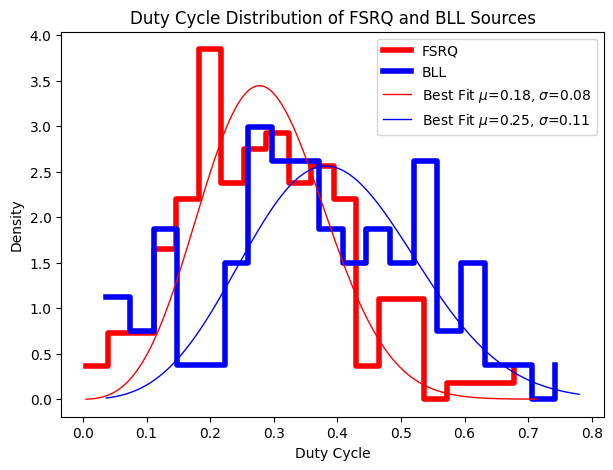

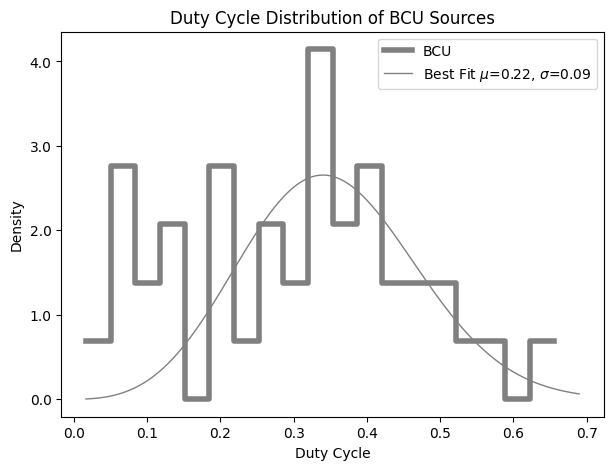

In [104]:
# Plotting the Distribution for Visuals.

def maxwellian_function(x, N, a):
    mu = 2*a*(np.sqrt(2/np.pi))
    return N * (x**2*np.exp(-(x - mu)**2/(2*a**2)))/a**3


y_fsrq,xe_fsrq=np.histogram(table[table[:,2]=='FSRQ'][:,1].astype(float),bins=20,density=True)
x_fsrq = (xe_fsrq[:-1]+xe_fsrq[1:])/2
x_fsrq_refine = np.linspace(xe_fsrq[0],xe_fsrq[-1],1000)
y_bll,xe_bll=np.histogram(table[table[:,2]=='BLL'][:,1].astype(float),bins=20,density=True)
x_bll = (xe_bll[:-1]+xe_bll[1:])/2
x_bll_refine = np.linspace(xe_bll[0],xe_bll[-1],1000)
y_bcu,xe_bcu=np.histogram(table[table[:,2]=='BCU'][:,1].astype(float),bins=20,density=True)
x_bcu = (xe_bcu[:-1]+xe_bcu[1:])/2
x_bcu_refine = np.linspace(xe_bcu[0],xe_bcu[-1],1000)


maxfsrq=maxwellian_function(x_fsrq,0.1,a=0.1)
popt_fsrq, pcov_fsrq = curve_fit(maxwellian_function, x_fsrq, y_fsrq,p0=[0.1,0.1],maxfev=5000)
fsrq_mean = 2 * popt_fsrq[1] * np.sqrt(2 / np.pi)
fsrq_std = np.sqrt((popt_fsrq[1]**2 * (3 * np.pi - 8)) / np.pi)
maxfsrq = maxwellian_function(x_fsrq_refine,popt_fsrq[0],popt_fsrq[1])

maxbll=maxwellian_function(x_bll,0.1,a=0.1)
popt_bll, pcov_bll = curve_fit(maxwellian_function, x_bll, y_bll,p0=[0.1,0.1],maxfev=5000)
bll_mean = 2 * popt_bll[1] * np.sqrt(2 / np.pi)
bll_std = np.sqrt((popt_bll[1]**2 * (3 * np.pi - 8)) / np.pi)
maxbll=maxwellian_function(x_bll_refine,popt_bll[0],popt_bll[1])

maxbcu=maxwellian_function(x_bcu,0.1,a=0.1)
popt_bcu, pcov_bcu = curve_fit(maxwellian_function, x_bcu, y_bcu,p0=[0.1,0.1],maxfev=5000)
bcu_mean = 2 * popt_bcu[1] * np.sqrt(2 / np.pi)
bcu_std = np.sqrt((popt_bcu[1]**2 * (3 * np.pi - 8)) / np.pi)
maxbcu = maxwellian_function(x_bcu_refine,popt_bcu[0],popt_bcu[1])

fig,ax = plt.subplots(figsize = (7,5))
#plt.hist(x=np.log(table[table[:,2]=='FSRQ'][:,1].astype(float)),label='FSRQ',bins=20,density=True,histtype='step',color='r',linewidth=4)
#plt.hist(x=np.log(table[table[:,2]=='BLL'][:,1].astype(float)),label='BLL',bins=20,density=True,histtype='step',color='blue',linewidth=4)
#plt.hist(x=np.log(table[table[:,2]=='BCU'][:,1].astype(float)),label='BCU',bins=20,density=True,histtype='step',color='grey',linewidth=2)

plt.step(xe_fsrq[:-1],y_fsrq,where='post',color='r',linewidth=4,label='FSRQ')
plt.step(xe_bll[:-1],y_bll,where='post',color='blue',linewidth=4,label='BLL')
#plt.step(xe_bcu[:-1],y_bcu,where='post',color='grey',linewidth=4)
plt.plot(x_fsrq_refine,maxfsrq,color='r',linewidth=1,label=f'Best Fit $\mu$={fsrq_mean:0.2f}, $\sigma$={fsrq_std:0.2f}')
plt.plot(x_bll_refine,maxbll,color='blue',linewidth=1,label=f'Best Fit $\mu$={bll_mean:0.2f}, $\sigma$={bll_std:0.2f}')
#plt.plot(x_bcu_refine,maxbcu,color='grey')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.legend()
plt.ylabel('Density')
plt.xlabel('Duty Cycle')
plt.title('Duty Cycle Distribution of FSRQ and BLL Sources')
#plt.savefig('DutyCycles/DutyCycle_FSRQ+BLL_0.5_fit.png')


fig,ax = plt.subplots(figsize = (7,5))
plt.step(xe_bcu[:-1],y_bcu,where='post',color='grey',linewidth=4,label='BCU')
plt.plot(x_bcu_refine,maxbcu,color='grey',linewidth=1,label=f'Best Fit $\mu$={bcu_mean:0.2f}, $\sigma$={bcu_std:0.2f}')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.legend()
plt.ylabel('Density')
plt.xlabel('Duty Cycle')
plt.title('Duty Cycle Distribution of BCU Sources')
#plt.savefig('DutyCycles/DutyCycle_BCU_0.5_fit.png')
print(fsrq_mean,bll_mean)


### KS Test

The Kolmogorov-Smirnov Test is a test to see whether a sample came from a given distribution, or, in the case of a two-sample KS Test, whether two samples came from the same distribution. The test can only reject the Null Hypothesis of "The sample(s) came from this distribution.", but cannot affirm the idea that the samples come from the same distribution. In other words, the two-sample KS Test shows that either \
\
a. The two samples come from different distributions, or \
b. There is not enough evidence to reject the Null Hypothesis


If the test returns a pvalue less than 0.05, this means that the two data sets are distinct from each other.\
If it returns a pvalue greater than 0.05, we cannot conclude anything.\
Here, I'll run the test with the default method setting, 'auto'.\
'Auto' will decide between 'exact' and 'asymp' depending on the size of the input array.

In [92]:
# Defining the two samples to be used for the Kolmogorov-Smirnov Test.

FSRQ_Sample = table[table[:,2]=='FSRQ'][:,1].astype(float)
BLL_Sample = table[table[:,2]=='BLL'][:,1].astype(float)
BCU_Sample = table[table[:,2]=='BCU'][:,1].astype(float)

scipy.stats.ks_2samp(FSRQ_Sample,BLL_Sample)

KstestResult(statistic=0.29383116883116883, pvalue=0.00029933229727246535, statistic_location=0.3284960422163588, statistic_sign=1)

Scipy documentation recommends using 'exact' for small arrays.\
It simply attempts to compute an exact pvalue.

In [93]:
print('Exact method results in:')
scipy.stats.ks_2samp(FSRQ_Sample,BLL_Sample,method='exact')

Exact method results in:


KstestResult(statistic=0.29383116883116883, pvalue=0.00029933229727246535, statistic_location=0.3284960422163588, statistic_sign=1)

Here, I'll use 'asymp' just to see if there's any significant changes.\
Asymp approximates the value, which is useful for large distributions/sizes.


In [94]:
print('Asymptotic method results in:')
scipy.stats.ks_2samp(FSRQ_Sample,BLL_Sample,method='asymp')


Asymptotic method results in:


KstestResult(statistic=0.2938311688311688, pvalue=0.00030397561150882204, statistic_location=0.3284960422163588, statistic_sign=1)

Because both return values below 0.05, the FSRQ and BLL samples come from distinct distributions.

### Reclassifying?

I wanted to look into classifying the BCU sources based on the distribution of the FSRQ and BLL duty cycles. I did some digging (and asking ChatGPT to explain some bits as well), and I found a very rudimentary way of classifying BCUs as FSRQs and BLLs, but the function spits out probabilities less than 90%, which I wouldn't bank on. I'll include them, just in case, though.

In [100]:
def classify_bcus(bcu_values, params_FSRQ, params_BLL, priors=(0.5, 0.5)):
    """
    Classify BCU values as FSRQ or BLL using fitted Maxwellian distributions.
    
    Parameters
    ----------
    bcu_values : array-like
        The candidate values to classify.
    params_FSRQ : tuple
        Parameters (N, a) from your Maxwellian fit to FSRQs.
    params_BLL : tuple
        Parameters (N, a) from your Maxwellian fit to BLLs.
    priors : tuple
        Prior probabilities (p_FSRQ, p_BLL). Defaults to (0.5, 0.5).
    
    Returns
    -------
    DataFrame with columns:
        value, pdf_FSRQ, pdf_BLL, P_FSRQ, P_BLL, classification
    """
    _, a_FSRQ = params_FSRQ
    _, a_BLL  = params_BLL
    
    values = np.array(bcu_values, dtype=float)
    
    # Evaluate probability densities
    pdf_FSRQ = maxwell.pdf(values, scale=a_FSRQ)
    pdf_BLL  = maxwell.pdf(values, scale=a_BLL)
    
    # Apply priors
    prior_FSRQ, prior_BLL = priors
    weighted_FSRQ = pdf_FSRQ * prior_FSRQ
    weighted_BLL  = pdf_BLL * prior_BLL
    
    # Normalize to get posterior probabilities
    denom = weighted_FSRQ + weighted_BLL
    P_FSRQ = weighted_FSRQ / denom
    P_BLL  = weighted_BLL  / denom
    

    # This is the part I want to improve. Some probabilities are around 50%, which isn't something I'd like to make claims about.
    
    classification = np.where(P_FSRQ >= P_BLL, "FSRQ", "BLL")
    
    return pd.DataFrame({
        "value": values,
        "pdf_FSRQ": pdf_FSRQ,
        "pdf_BLL": pdf_BLL,
        "P_FSRQ": P_FSRQ,
        "P_BLL": P_BLL,
        "classification": classification
    })


In [101]:
# Defining parameters for the fit.

params_FSRQ = popt_fsrq[0],popt_fsrq[1]
params_BLL = popt_bll[0],popt_bll[1]


In [102]:
# Making the array of classifications.
classified_array = classify_bcus(BCU_Sample,params_FSRQ=params_FSRQ,params_BLL=params_BLL)

# Combining the known classifications with the probable calculations
classified_all = np.vstack((table[:,[1,2]],pd.DataFrame.to_numpy(classified_array)[:,[0,5]]))

# Displaying the classified array.
classified_array.head(50)

,value,pdf_FSRQ,pdf_BLL,P_FSRQ,P_BLL,classification
0,0.016320,0.139898,0.053978,0.721586,0.278414,FSRQ
1,0.053888,1.379425,0.558064,0.711965,0.288035,FSRQ
2,0.060000,1.665324,0.682207,0.709394,0.290606,FSRQ
3,0.060505,1.689569,0.692897,0.709168,0.290832,FSRQ
4,0.078167,2.568730,1.100838,0.700009,0.299991,FSRQ
5,0.093960,3.346438,1.505916,0.689653,0.310347,FSRQ
6,0.107527,3.949206,1.866635,0.679043,0.320957,FSRQ
7,0.120690,4.437307,2.213659,0.667167,0.332833,FSRQ
8,0.130345,4.719206,2.459090,0.657427,0.342573,FSRQ
9,0.130582,4.725240,2.464972,0.657177,0.342823,FSRQ


0.17463676514378007 0.24890475199258905


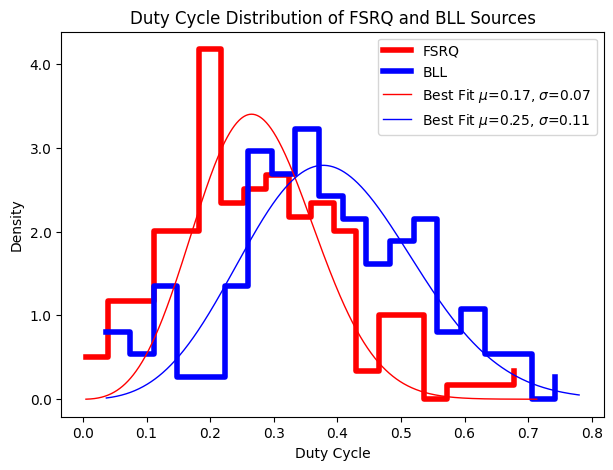

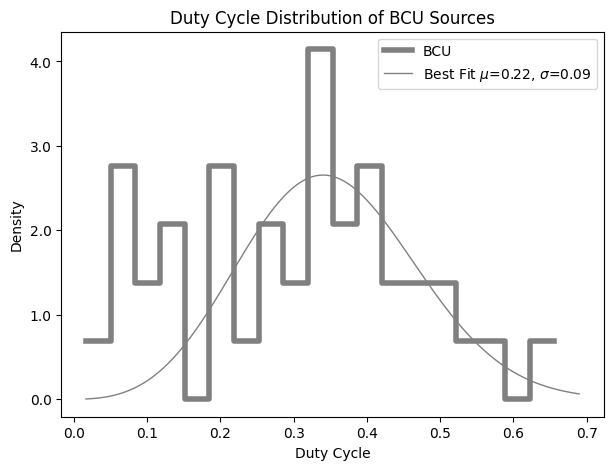

In [103]:
# Plotting the Distribution for Visuals.

def maxwellian_function(x, N, a):
    mu = 2*a*(np.sqrt(2/np.pi))
    return N * (x**2*np.exp(-(x - mu)**2/(2*a**2)))/a**3


y_fsrq,xe_fsrq=np.histogram(classified_all[classified_all[:,1]=='FSRQ'][:,0].astype(float),bins=20,density=True)
x_fsrq = (xe_fsrq[:-1]+xe_fsrq[1:])/2
x_fsrq_refine = np.linspace(xe_fsrq[0],xe_fsrq[-1],1000)
y_bll,xe_bll=np.histogram(classified_all[classified_all[:,1]=='BLL'][:,0].astype(float),bins=20,density=True)
x_bll = (xe_bll[:-1]+xe_bll[1:])/2
x_bll_refine = np.linspace(xe_bll[0],xe_bll[-1],1000)
y_bcu,xe_bcu=np.histogram(classified_all[classified_all[:,1]=='BCU'][:,0].astype(float),bins=20,density=True)
x_bcu = (xe_bcu[:-1]+xe_bcu[1:])/2
x_bcu_refine = np.linspace(xe_bcu[0],xe_bcu[-1],1000)


maxfsrq=maxwellian_function(x_fsrq,0.1,a=0.1)
popt_fsrq, pcov_fsrq = curve_fit(maxwellian_function, x_fsrq, y_fsrq,p0=[0.1,0.1],maxfev=5000)
fsrq_mean = 2 * popt_fsrq[1] * np.sqrt(2 / np.pi)
fsrq_std = np.sqrt((popt_fsrq[1]**2 * (3 * np.pi - 8)) / np.pi)
maxfsrq = maxwellian_function(x_fsrq_refine,popt_fsrq[0],popt_fsrq[1])

maxbll=maxwellian_function(x_bll,0.1,a=0.1)
popt_bll, pcov_bll = curve_fit(maxwellian_function, x_bll, y_bll,p0=[0.1,0.1],maxfev=5000)
bll_mean = 2 * popt_bll[1] * np.sqrt(2 / np.pi)
bll_std = np.sqrt((popt_bll[1]**2 * (3 * np.pi - 8)) / np.pi)
maxbll=maxwellian_function(x_bll_refine,popt_bll[0],popt_bll[1])

maxbcu=maxwellian_function(x_bcu,0.1,a=0.1)
popt_bcu, pcov_bcu = curve_fit(maxwellian_function, x_bcu, y_bcu,p0=[0.1,0.1],maxfev=5000)
bcu_mean = 2 * popt_bcu[1] * np.sqrt(2 / np.pi)
bcu_std = np.sqrt((popt_bcu[1]**2 * (3 * np.pi - 8)) / np.pi)
maxbcu = maxwellian_function(x_bcu_refine,popt_bcu[0],popt_bcu[1])

fig,ax = plt.subplots(figsize = (7,5))

plt.step(xe_fsrq[:-1],y_fsrq,where='post',color='r',linewidth=4,label='FSRQ')
plt.step(xe_bll[:-1],y_bll,where='post',color='blue',linewidth=4,label='BLL')
#plt.step(xe_bcu[:-1],y_bcu,where='post',color='grey',linewidth=4)
plt.plot(x_fsrq_refine,maxfsrq,color='r',linewidth=1,label=f'Best Fit $\mu$={fsrq_mean:0.2f}, $\sigma$={fsrq_std:0.2f}')
plt.plot(x_bll_refine,maxbll,color='blue',linewidth=1,label=f'Best Fit $\mu$={bll_mean:0.2f}, $\sigma$={bll_std:0.2f}')
#plt.plot(x_bcu_refine,maxbcu,color='grey')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.legend()
plt.ylabel('Density')
plt.xlabel('Duty Cycle')
plt.title('Duty Cycle Distribution of FSRQ and BLL Sources')


fig,ax = plt.subplots(figsize = (7,5))
plt.step(xe_bcu[:-1],y_bcu,where='post',color='grey',linewidth=4,label='BCU')
plt.plot(x_bcu_refine,maxbcu,color='grey',linewidth=1,label=f'Best Fit $\mu$={bcu_mean:0.2f}, $\sigma$={bcu_std:0.2f}')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.legend()
plt.ylabel('Density')
plt.xlabel('Duty Cycle')
plt.title('Duty Cycle Distribution of BCU Sources')
print(fsrq_mean,bll_mean)
